# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [38]:
colors = pd.read_csv('data/colors.csv')

In [39]:
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [40]:
colors.shape # 135 rows and 4 columns

(135, 4)

In [41]:
colors.name.unique() # array of unique names

array(['Unknown', 'Black', 'Blue', 'Green', 'Dark Turquoise', 'Red',
       'Dark Pink', 'Brown', 'Light Gray', 'Dark Gray', 'Light Blue',
       'Bright Green', 'Light Turquoise', 'Salmon', 'Pink', 'Yellow',
       'White', 'Light Green', 'Light Yellow', 'Tan', 'Light Violet',
       'Glow In Dark Opaque', 'Purple', 'Dark Blue-Violet', 'Orange',
       'Magenta', 'Lime', 'Dark Tan', 'Bright Pink', 'Medium Lavender',
       'Lavender', 'Trans-Black IR Lens', 'Trans-Dark Blue',
       'Trans-Green', 'Trans-Bright Green', 'Trans-Red', 'Trans-Black',
       'Trans-Light Blue', 'Trans-Neon Green', 'Trans-Very Lt Blue',
       'Trans-Dark Pink', 'Trans-Yellow', 'Trans-Clear', 'Trans-Purple',
       'Trans-Neon Yellow', 'Trans-Neon Orange', 'Chrome Antique Brass',
       'Chrome Blue', 'Chrome Green', 'Chrome Pink', 'Chrome Black',
       'Very Light Orange', 'Light Purple', 'Reddish Brown',
       'Light Bluish Gray', 'Dark Bluish Gray', 'Medium Blue',
       'Medium Green', 'Speckle Black-

In [42]:
len(colors.name.unique()) #how many columns are unique

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [43]:
colors.groupby('is_trans').count() # counting the groupby

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [44]:
colors.is_trans.value_counts() #cleaner way of doing the same thing

f    107
t     28
Name: is_trans, dtype: int64

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [45]:
sets = pd.read_csv('data/sets.csv')

In [46]:
sets.shape

(15710, 5)

In [47]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [48]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [49]:
sets_by_year = sets.groupby('year').count()
sets_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

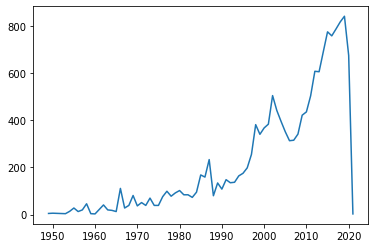

In [50]:
plt.plot(sets_by_year.index, sets_by_year.set_num)

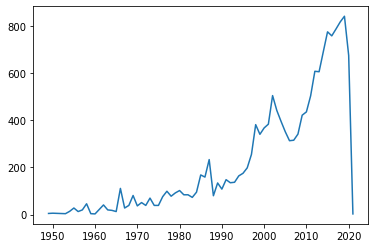

In [51]:
plt.plot(sets_by_year.index, sets_by_year.set_num)

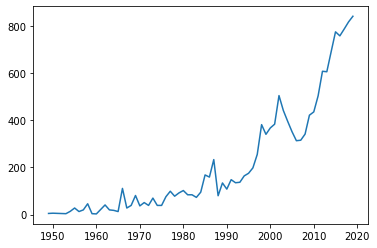

In [53]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2]) 
#plot without the last two years

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [60]:
len(sets.theme_id) == len(sets.theme_id.unique()) #not all ids are unique

False

In [63]:
themes_by_year = sets.groupby('year').agg({'theme_id' : pd.Series.nunique})
#  https://stackoverflow.com/questions/18554920/pandas-aggregate-count-distinct

In [65]:
themes_by_year.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [66]:
themes_by_year.tail()

,theme_id
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

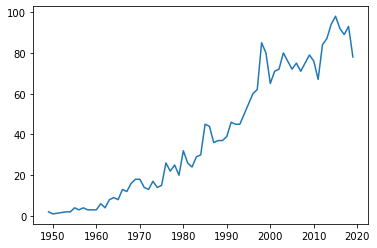

In [67]:
plt.plot(themes_by_year.index[:-2], themes_by_year.theme_id[:-2])


### Line Charts with Two Seperate Axes

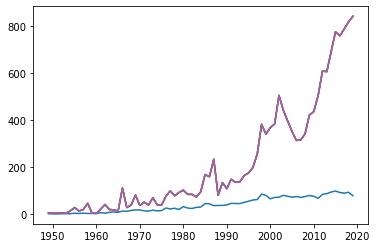

In [69]:
plt.plot(themes_by_year.index[:-2], themes_by_year.theme_id[:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year[:-2])

Text(0, 0.5, 'Number of Themes')

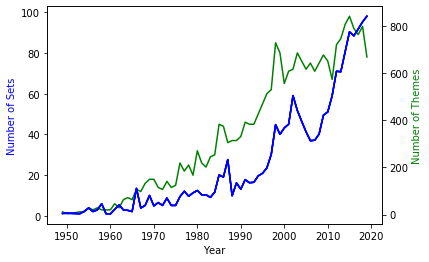

In [81]:
ax1 = plt.gca() #x -axis
ax2 = ax1.twinx()

ax1.plot(themes_by_year.index[:-2], themes_by_year.theme_id[:-2], color='g')
ax2.plot(sets_by_year.index[:-2], sets_by_year[:-2], color='b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color ='b')
ax2.set_ylabel('Number of Themes', color='g')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [85]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

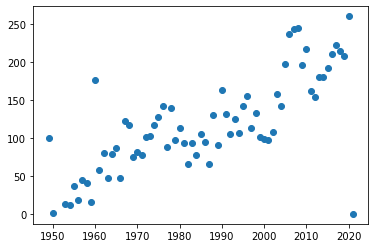

In [88]:
plt.scatter(x=parts_per_set.index, y=parts_per_set.num_parts)